# Importing Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#import dataset
df=pd.read_csv(r'C:\Users\Nitesh\iitRopar\CDPC\DataScientistInterview\DataAnalytcisProject\Diwali Sales Data.csv', encoding='unicode_escape')

In [8]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [9]:
df.shape

(11251, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Cleaning

In [11]:
#drop unwanted columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [12]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [13]:
#check null values
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [14]:
#drop the null values
df.dropna(inplace=True)

In [15]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [16]:
#convert datatype
df['Amount']=df['Amount'].astype('int')


In [20]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [21]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [22]:
df.describe(include='object')

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11239,11239,11239,11239,11239,11239,11239,11239
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7832,4541,1944,4289,1583,2655


# EDA

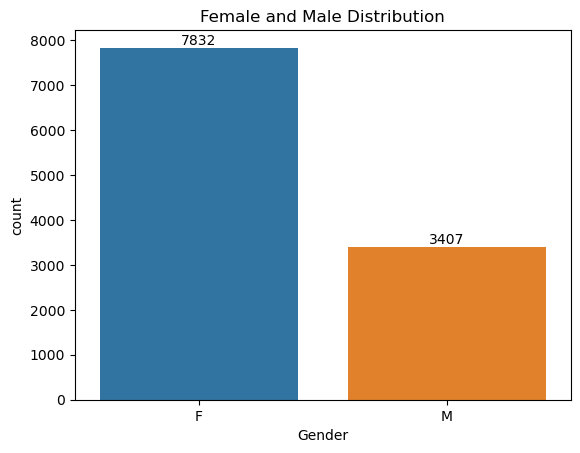

In [32]:
#EDA
ax=sns.countplot(x='Gender',data=df, hue='Gender' )
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Female and Male Distribution')
plt.show()

In [30]:
df.groupby(['Gender'])['Amount'].sum()

Gender
F    74335853
M    31913276
Name: Amount, dtype: int32

 Most of the buyers are females adnd their purchasing power is higher than Males by almost more than twice

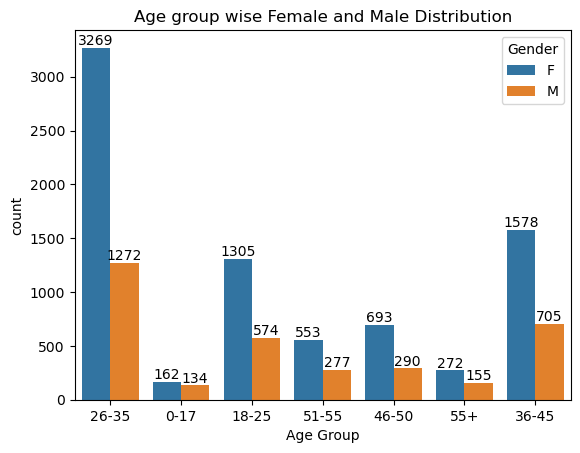

In [37]:
ax=sns.countplot(x='Age Group', data=df, hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Age group wise Female and Male Distribution')
plt.show()

We can clearly see the age group 26-35 have done shopping more frequently then others

In [39]:
#total amt vs age
sales_age=df.groupby(['Age Group'])['Amount'].sum().sort_values(ascending=False)

In [40]:
sales_age

Age Group
26-35    42613442
36-45    22144994
18-25    17240732
46-50     9207844
51-55     8261477
55+       4080987
0-17      2699653
Name: Amount, dtype: int32

Its understandable that even most amount spent is by age group 26-35

In [51]:
# top 5 states
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(5)

In [52]:
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252


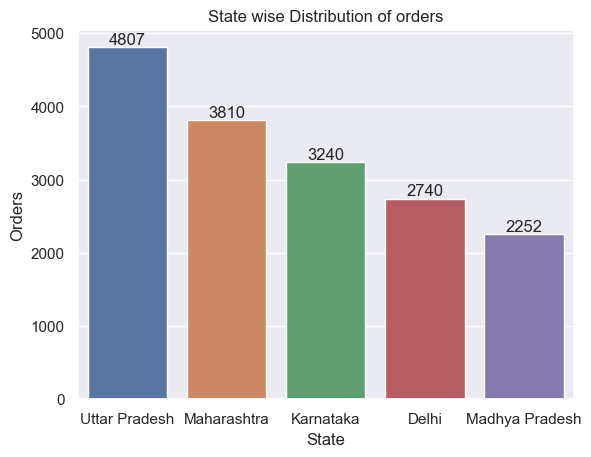

In [59]:
sales_state
ax=sns.barplot(data=sales_state,x='State',y='Orders', hue='State')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('State wise Distribution of orders')
plt.show()

In [60]:
df.head

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [62]:

def yesno(val):
    if val==0:
        return 'Not Married'
    else:
        return 'Married'
df['Marital_Status']=df['Marital_Status'].apply(yesno)

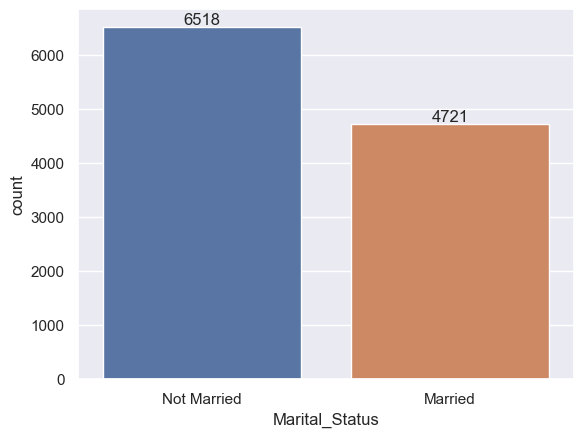

In [69]:
ax=sns.countplot(x='Marital_Status',data=df, hue='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

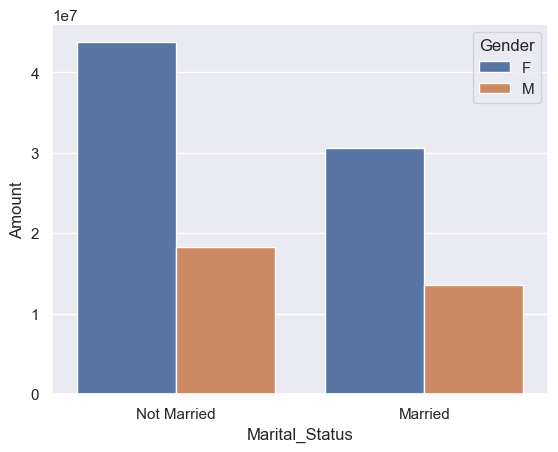

In [71]:
married_data=sales_state=df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=married_data, x='Marital_Status', y='Amount', hue='Gender')

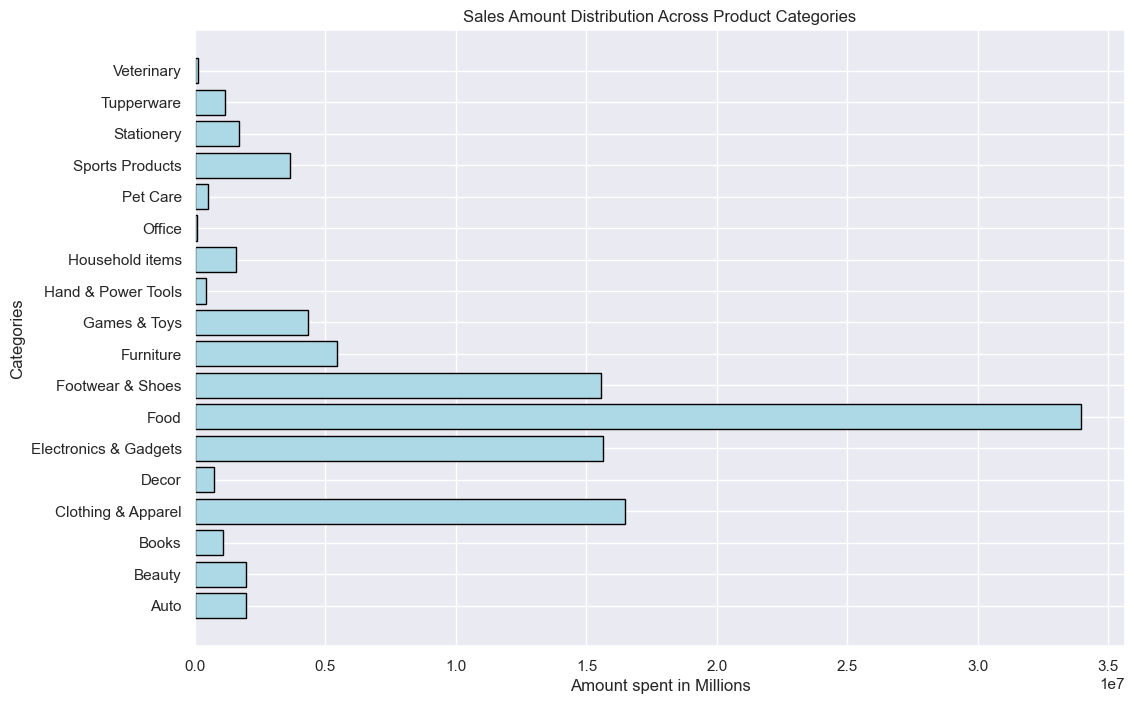

In [84]:
x = df.groupby("Product_Category")["Amount"].sum().index
y = df.groupby("Product_Category")["Amount"].sum()

plt.figure(figsize=(12, 8))
plt.barh(x, y, color='lightblue', edgecolor="black")
plt.xlabel('Amount spent in Millions')
plt.ylabel('Categories')
plt.title("Sales Amount Distribution Across Product Categories")

plt.show()

So food category is the one on which money was spent significantly higher than other categories

In [74]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

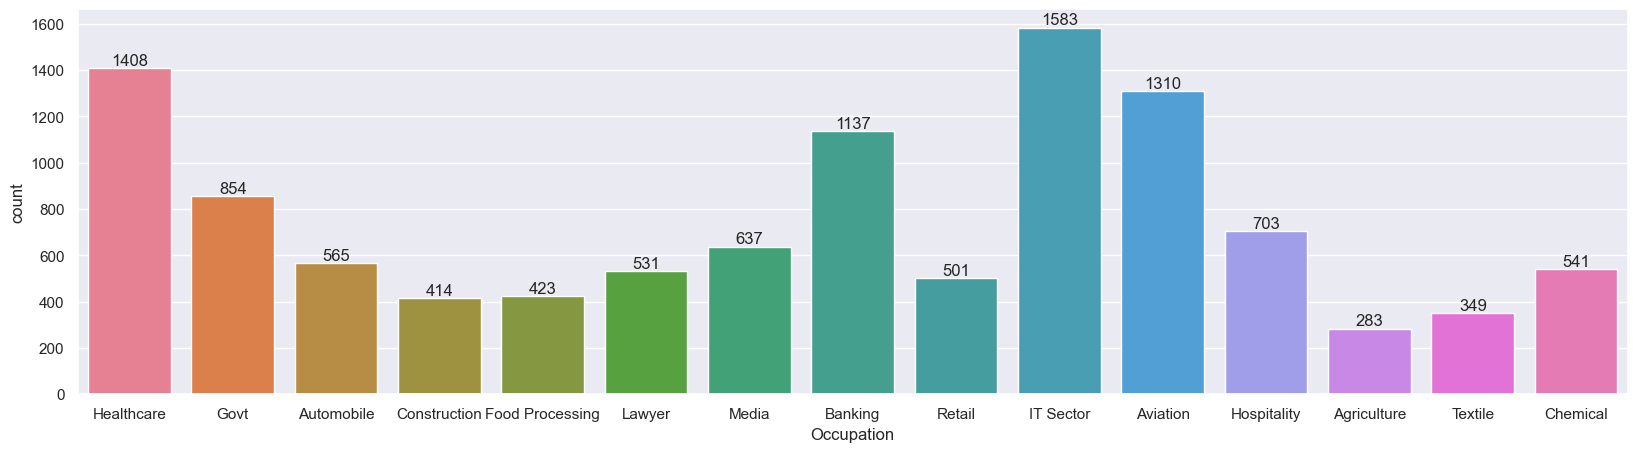

In [79]:
plt.figure(figsize=(20, 5))
ax=sns.countplot(x='Occupation',data=df, hue='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

so major amount was spent by individuals working in Healthcare, IT, Aviation, Banking.

# Many significant insights are revealed by the final analysis of the Diwali sales data. First off, the largest group is made up primarily of people in the 26–35 age range, with a sizable proportion of females. The majority of clients in the sector-wise distribution come from the healthcare industry adn IT Sector. The Food category has the highest sales volume, making it stand out in terms of sales performance. UP, Maharashtra saw significantly higher number of orders and sales amount.

## To improve customer engagement and boost sales, sector-specific approaches, product offerings, and targeted marketing strategies can all be informed by these insights.